In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import glob  # for merging the files
import re    # for regex oprations perform during the analysis

### Import files


### Merging

In [2]:
path=r"Sales_Data"
files=glob.glob(path+"/*.csv")
df_list=[]
for file in files:
    df=pd.read_csv(file,index_col=False,header=0)
    df_list.append(df)
sales=pd.concat(df_list,axis = 0,ignore_index=True,)  
sales.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [3]:
#sales.to_csv("Sales.csv",index=False)

### Check datatypes of DF columns wit some other usefull information

In [4]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
sales.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## Cleaning

In [7]:
nan_df=sales[sales.isna().any(axis=1)]               #finding the none values
nan_df.info()
nan_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 1 to 186826
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          0 non-null      object
 1   Product           0 non-null      object
 2   Quantity Ordered  0 non-null      object
 3   Price Each        0 non-null      object
 4   Order Date        0 non-null      object
 5   Purchase Address  0 non-null      object
dtypes: object(6)
memory usage: 29.8+ KB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sales.dropna(how="all",inplace=True)

### clean "or"

In [9]:
temp_df=sales[sales["Order Date"].str[:2]=="Or"]           #cleaning data wiche is not in requred formate
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
sales=sales[sales["Order Date"].str[:2]!="Or"]


##  adding month

In [11]:
sales["month"]=sales["Order Date"].str[:2]

In [12]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [13]:
sales["month"] = sales["month"].astype("int32")
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


## changeing datatypes

In [14]:
sales["Price Each"] = sales["Price Each"].astype("float")
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [15]:
sales["Quantity Ordered"] = sales["Quantity Ordered"].astype("int32")
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [16]:
sales["Order Date"] = sales["Order Date"].astype("datetime64")
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [17]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(3)
memory usage: 9.9+ MB


# hence the data is clean and in correct datatype ........................................................

# EDA

## Q1) What was the best month for sales? How much was earned that month?

In [79]:
sales_Q1=pd.DataFrame(sales[["Price Each","Quantity Ordered","month"]])
sales_Q1

,Price Each,Quantity Ordered,month
0,11.95,2,4
2,99.99,1,4
3,600.00,1,4
4,11.99,1,4
5,11.99,1,4
...,...,...,...
186845,2.99,3,9
186846,700.00,1,9
186847,700.00,1,9
186848,379.99,1,9


In [80]:
sales_Q1["Total_Bill"]=sales_Q1["Price Each"]*sales_Q1["Quantity Ordered"]
sales_Q1

,Price Each,Quantity Ordered,month,Total_Bill
0,11.95,2,4,23.90
2,99.99,1,4,99.99
3,600.00,1,4,600.00
4,11.99,1,4,11.99
5,11.99,1,4,11.99
...,...,...,...,...
186845,2.99,3,9,8.97
186846,700.00,1,9,700.00
186847,700.00,1,9,700.00
186848,379.99,1,9,379.99


In [81]:
sales_Q1 = sales_Q1.groupby("month").sum()
sales_Q1

,Price Each,Quantity Ordered,Total_Bill
month,,,
1,1.811768e+06,10903,1.822257e+06
2,2.188885e+06,13449,2.202022e+06
3,2.791208e+06,17005,2.807100e+06
4,3.367671e+06,20558,3.390670e+06
5,3.135125e+06,18667,3.152607e+06
6,2.562026e+06,15253,2.577802e+06
7,2.632540e+06,16072,2.647776e+06
8,2.230345e+06,13448,2.244468e+06
9,2.084992e+06,13109,2.097560e+06


In [82]:
sales_Q1.drop(["Price Each"],axis = 1,inplace=True)

# Ans-1

In [125]:
max_s=sales_Q1["Total_Bill"].max()
min_s=sales_Q1["Total_Bill"].min()
sales_Q1[sales_Q1["Total_Bill"]==max_s]

,Quantity Ordered,Total_Bill
month,,
12,28114,4.613443e+06


In [126]:
min_s,max_s

(1822256.729999914, 4613443.340001534)

# coustomized ploting

In [127]:
Month_list=["January" ,"February" ,"March" ,"April" ,"May" ,"June","July", "August","September" ,"October" ,"November","December"]

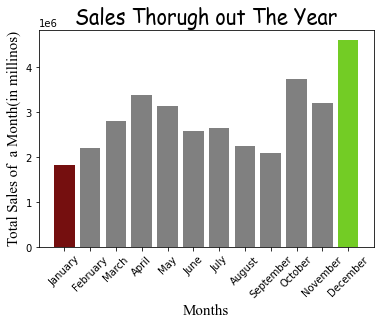

In [136]:
clrs = ['grey' if (x < max_s and x > min_s)   else ('#750f0f' if x == min_s else '#73cc25') for x in sales_Q1["Total_Bill"] ]
plt.bar(Month_list,sales_Q1["Total_Bill"], color=clrs)
plt.xticks(Month_list)
plt.ylabel("Total Sales of  a Month(in millinos)",fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.xlabel("Months",fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.title("Sales Thorugh out The Year",fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xticks(rotation=45)
#plt.savefig('1.png', dpi=300)

plt.show()


# What city sold the most product?

In [27]:
sales["Sales"] = sales["Price Each"]*sales["Quantity Ordered"]
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


# ****
### add new column for city's   


In [28]:
def city_filter(x):
     a = re.search(r"(?<=, )(([A-Z][a-z]+ )*?([A-Z][a-z]+)(?=,))",x)   
     return a.group()
def state_filter(x):
    a = re.search(r"(?<= )([A-Z]{2})(?= )",x)    
    return a.group()

sales["city"] = sales["Purchase Address"].apply(lambda x: f"{city_filter(x)}  ({state_filter(x)})")
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [59]:
sales_df2=sales.groupby("city").sum()
sales_df2.drop(["Price Each","month"],axis = 1,inplace=True)
sales_df2

,Quantity Ordered,Sales
city,,
Atlanta (GA),16602,2.795499e+06
Austin (TX),11153,1.819582e+06
Boston (MA),22528,3.661642e+06
Dallas (TX),16730,2.767975e+06
Los Angeles (CA),33289,5.452571e+06
New York City (NY),27932,4.664317e+06
Portland (ME),2750,4.497583e+05
Portland (OR),11303,1.870732e+06
San Francisco (CA),50239,8.262204e+06


In [138]:
sales_df2.loc[sales_df2.index].max()

Quantity Ordered    5.023900e+04
Sales               8.262204e+06
dtype: float64

In [139]:
max_s=sales_df2["Sales"].max()
min_s=sales_df2["Sales"].min()
sales_df2[sales_df2["Sales"]==max_s]

,Quantity Ordered,Sales
city,,
San Francisco (CA),50239,8.262204e+06


In [140]:
sales_df2[sales_df2["Sales"]==min_s]

,Quantity Ordered,Sales
city,,
Portland (ME),2750,449758.27


In [141]:
sales_df2.index

Index(['Atlanta  (GA)', 'Austin  (TX)', 'Boston  (MA)', 'Dallas  (TX)',
       'Los Angeles  (CA)', 'New York City  (NY)', 'Portland  (ME)',
       'Portland  (OR)', 'San Francisco  (CA)', 'Seattle  (WA)'],
      dtype='object', name='city')

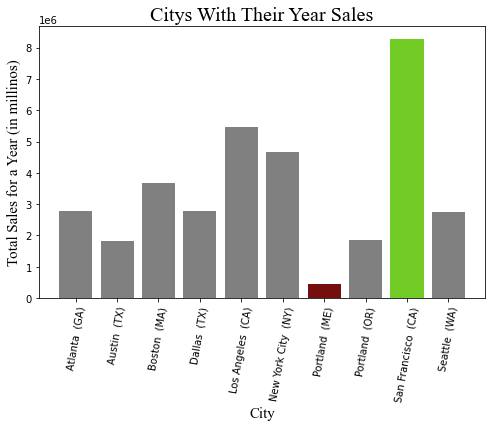

In [142]:
plt.figure( figsize= (8,5))
clrs = ['grey' if (x < max_s and x > min_s)   else ('#750f0f' if x == min_s else '#73cc25') for x in sales_df2["Sales"] ]
plt.bar(sales_df2.index,sales_df2["Sales"], color=clrs)
plt.xticks(sales_df2.index)
plt.ylabel("Total Sales for a Year (in millinos)",fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.xlabel("City",fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.xticks(rotation=80)
plt.title("Citys With Their Year Sales",fontdict={'fontname': 'Times New Roman', 'fontsize': 20})
#plt.savefig('2.png', dpi=300)
plt.show()


## What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [67]:
sales["time"]=sales["Order Date"].dt.strftime('%H')
sales["date"]=sales["Order Date"].dt.strftime('%Y-%m-%d')
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,time,date
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),08,2019-04-19
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,2019-04-07
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,2019-04-12
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,2019-04-12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),09,2019-04-30
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,2019-09-17
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,2019-09-01
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),07,2019-09-23
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,2019-09-19


In [68]:
sales_df3= sales.groupby("time").sum()
sales_df3

,Quantity Ordered,Price Each,month,Sales
time,,,,
00,4428,709296.70,27554,713721.27
01,2619,458490.00,16657,460866.88
02,1398,233833.64,8507,234851.44
03,928,144726.42,5904,145757.89
04,937,162058.18,6148,162661.01
05,1493,229621.21,9301,230679.82
06,2810,445000.11,17539,448113.00
07,4556,740568.11,28850,744854.12
08,7002,1185970.62,43626,1192348.97


In [89]:
sales_df3.loc[sales_df3.index].max()

Quantity Ordered      14470.00
Price Each          2398588.31
month                 91389.00
Sales               2412938.54
dtype: float64

In [143]:
max_s=sales_df3["Sales"].max()
min_s=sales_df3["Sales"].min()
sales_df3[sales_df3["Sales"]==max_s]

,Quantity Ordered,Price Each,month,Sales
time,,,,
19,14470,2398588.31,91389,2412938.54


In [144]:
sales_df3[sales_df3["Sales"]==min_s]

,Quantity Ordered,Price Each,month,Sales
time,,,,
03,928,144726.42,5904,145757.89


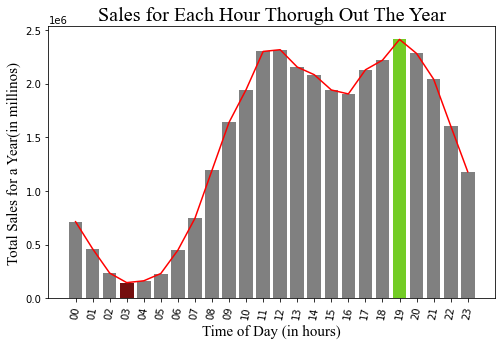

In [145]:

plt.figure( figsize= (8,5))
clrs = ['grey' if (x < max_s and x > min_s)   else ('#750f0f' if x == min_s else '#73cc25') for x in sales_df3["Sales"] ]
plt.plot(sales_df3.index,sales_df3["Sales"] ,color= 'r')  
#plt.xticks(sales_df3.index)
plt.bar(sales_df3.index,sales_df3["Sales"] ,color=clrs )  
#plt.xticks(sales_df3.index)
plt.ylabel("Total Sales for a Year(in millinos)",fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.xlabel("Time of Day (in hours)",fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
#plt.grid()
plt.xticks(rotation=80)
plt.title("Sales for Each Hour Thorugh Out The Year",fontdict={'fontname': 'Times New Roman', 'fontsize': 20})
#plt.savefig('3.png', dpi=300)
plt.show()


### the graph above tell us the best time for ads is from 11:00-12:00 and 18:00-20:00

##  What product sold the most? Why do you think it sold the most?

In [94]:
sales_df5=sales.groupby("Product").sum()
sales_df5

,Quantity Ordered,Price Each,month,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


In [95]:
sales_df5.loc[sales_df5.index].max()

Quantity Ordered      31017.0
Price Each          8030800.0
month                154819.0
Sales               8037600.0
dtype: float64

In [146]:
max_s=sales_df5["Sales"].max()
min_s=sales_df5["Sales"].min()
sales_df5[sales_df5["Sales"]==max_s]

,Quantity Ordered,Price Each,month,Sales
Product,,,,
Macbook Pro Laptop,4728,8030800.0,33548,8037600.0


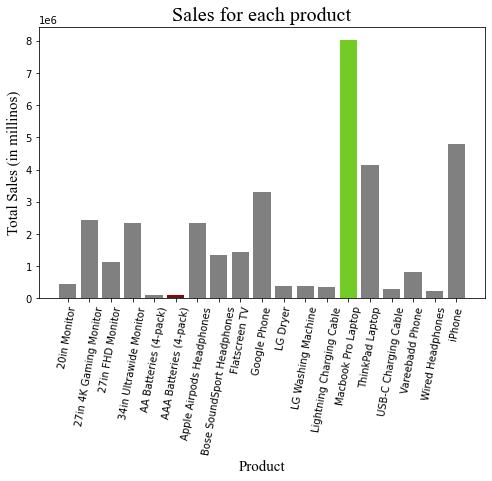

In [147]:
plt.figure( figsize= (8,5))
clrs = ['grey' if (x < max_s and x > min_s)   else ('#750f0f' if x == min_s else '#73cc25') for x in sales_df5["Sales"] ]
#plt.plot(sales_df5.index,sales_df5["Sales"] ,color= 'r')  
#plt.xticks(sales_df3.index)
plt.bar(sales_df5.index,sales_df5["Sales"] ,color=clrs )  
#plt.xticks(sales_df3.index)
plt.ylabel("Total Sales (in millinos)",fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.xlabel("Product",fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.xticks(rotation=80)
plt.title("Sales for each product",fontdict={'fontname': 'Times New Roman', 'fontsize': 20})
#plt.savefig('4.png', dpi=300)
plt.show()


In [149]:
max_s=sales_df5["Quantity Ordered"].max()
min_s=sales_df5["Quantity Ordered"].min()
sales_df5[sales_df5["Quantity Ordered"]==max_s]

,Quantity Ordered,Price Each,month,Sales
Product,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83


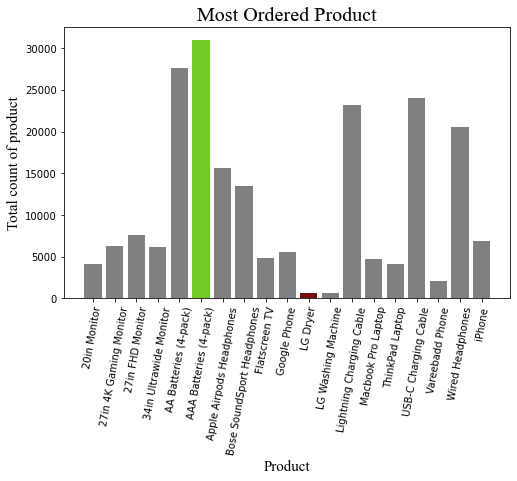

In [150]:
plt.figure( figsize= (8,5))
clrs = ['grey' if (x < max_s and x > min_s)   else ('#750f0f' if x == min_s else '#73cc25') for x in sales_df5["Quantity Ordered"] ]
#plt.plot(sales_df3.index,sales_df5["P_count"] ,color= 'r')  
#plt.xticks(sales_df3.index)
plt.bar(sales_df5.index,sales_df5["Quantity Ordered"] ,color=clrs )  
#plt.xticks(sales_df3.index)
plt.ylabel("Total count of product",fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.xlabel("Product",fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.xticks(rotation=80)
plt.title("Most Ordered Product",fontdict={'fontname': 'Times New Roman', 'fontsize': 20})
#plt.savefig('5.png', dpi=300)
plt.show()


## Lets compare the above to graphs

<ipython-input-151-d7a7b906d52d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation = "90")


<Figure size 720x360 with 0 Axes>

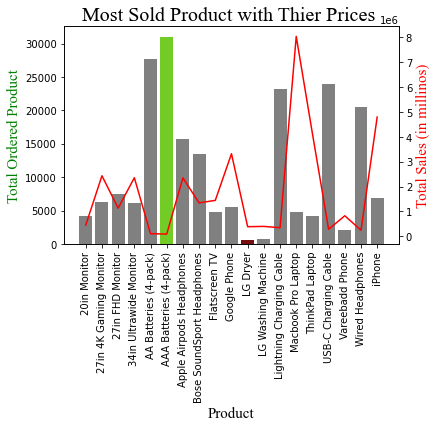

In [151]:
x =  sales_df5.index
y1 = sales_df5["Quantity Ordered"]
y2 = sales_df5["Sales"]
fig = plt.figure(figsize= (10,5))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
clrs = ['grey' if (x < max_s and x > min_s)   else ('#750f0f' if x == min_s else '#73cc25') for x in sales_df5["Quantity Ordered"] ]
ax1.bar(x, y1,color=clrs)
ax2.plot(x, y2, 'r-')
ax1.set_xlabel("Product",fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
ax2.set_ylabel("Total Sales (in millinos)", color='r',fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
ax1.set_ylabel("Total Ordered Product", color='g',fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
ax1.set_xticklabels(x, rotation = "90")
plt.title("Most Sold Product with Thier Prices ",fontdict={'fontname': 'Times New Roman', 'fontsize': 20})
#plt.savefig('6.png', dpi=300)
plt.show()

## the above graph shows that the product with low price are ordered most but the product with high *price and demand* are the main source of Company's income 

### Hence our winners is Macbook Pro